<a href="https://colab.research.google.com/github/ToanToan110/CustomerSugmentation/blob/main/Topic_2_CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Mỗi khách hàng có các hành vi sử dụng sản phẩm khác nhau dựa trên các đặc điểm riêng của họ như độ tuổi, giới tính, thu nhập, ...

>**Customer Segmentation - Phân khúc khách hàng**: kĩ thuật chia các khách hàng thánh các nhóm có các đặc trưng riêng biệt để phục vụ cho mục đích kinh doanh, phân tích hành vi, thấu hiểu khách hàng.


> Tùy theo nhu cầu phân tích mà sẽ có các cách phân khúc khác nhau









# I. Import Needed Library

In [ ]:
import pandas as pd
import numpy as np
# import plotly.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Driven Growth Series/OnlineRetail.csv", encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# II. Phân khúc theo RFM

## Recency

In [ ]:
df.rename({'InvoiceDate':'InvoiceDatetime'}, axis = 1, inplace=True)
df['InvoiceDatetime'] = pd.to_datetime(df['InvoiceDatetime'])
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDatetime'].dt.strftime('%Y-%m-%d'))
df['InvoiceMonth'] = df['InvoiceDatetime'].map(lambda date: 100*date.year + date.month)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDatetime,UnitPrice,CustomerID,Country,InvoiceDate,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,201012
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09,201112
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,201112
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,201112
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,201112


In [ ]:
last_purchase_date = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
last_purchase_date.columns = ['CustomerID','LastPurchaseDate']
max_date = last_purchase_date['LastPurchaseDate'].max()
last_purchase_date['DateRecency'] = (max_date - last_purchase_date['LastPurchaseDate']).dt.days
last_purchase_date.head()

,CustomerID,LastPurchaseDate,DateRecency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


<Axes: title={'center': 'DateRecency'}, ylabel='Frequency'>

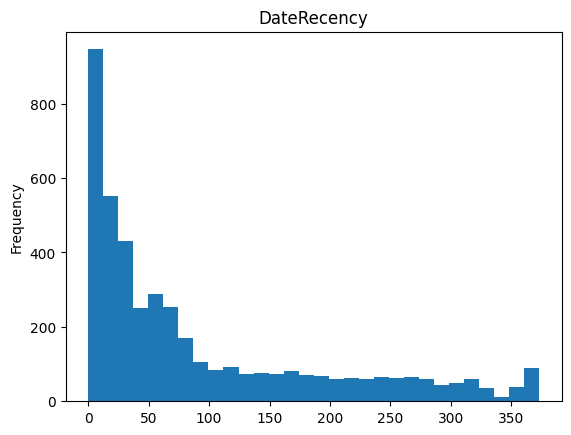

In [ ]:
last_purchase_date['DateRecency'].plot(kind='hist', bins=30, title='DateRecency')

## Frequency

In [ ]:
#get order counts for each user and create a dataframe with it
tx_frequency = df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
tx_frequency.columns = ['CustomerID','Frequency']

#add this data to our main dataframe
tx_user = pd.merge(df, tx_frequency, on='CustomerID')
tx_user

,InvoiceNo,StockCode,Description,Quantity,InvoiceDatetime,UnitPrice,CustomerID,Country,InvoiceDate,InvoiceMonth,Frequency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,201012,312
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,201012,312
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,201012,312
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,201012,312
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,201012,312
...,...,...,...,...,...,...,...,...,...,...,...
406824,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany,2011-12-09,201112,38
406825,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany,2011-12-09,201112,38
406826,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany,2011-12-09,201112,38
406827,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany,2011-12-09,201112,38


<Axes: title={'center': 'Frequency'}, ylabel='Frequency'>

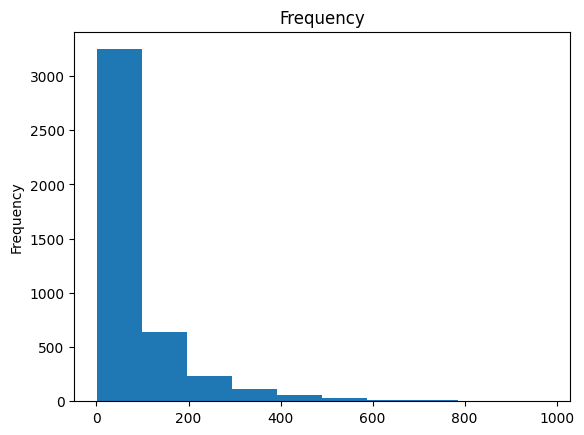

In [ ]:
tx_frequency[tx_frequency['Frequency'] < 1000]['Frequency'].plot(kind='hist', title='Frequency')

## Montary value

(-1000.0, 10568.8305)

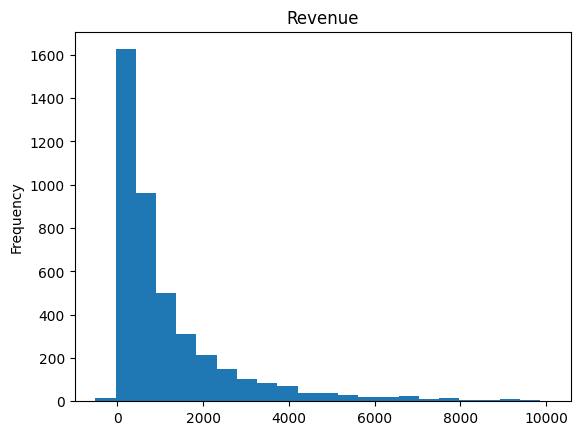

In [ ]:
#get order counts for each user and create a dataframe with it
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df_revenue = df.groupby('CustomerID')['Revenue'].sum().reset_index()
# tx_frequency.columns = ['CustomerID','Re']
ax = df_revenue[df_revenue['Revenue'] < 10000]['Revenue'].plot(kind='hist', bins=30, title='Revenue')
ax.set_xlim(-1000)

# III. Sử dụng kĩ thuật Kmean để phân khúc

> **Thuật toán K-means:** thuật toán học không giám sát, phân chia dữ liệu vào các cụm sao cho các điểm dữ liệu trong cùng một cụm thì có tính chất giống nhau



In [ ]:
# Data RFM dùng trể train dữ liệu
df_rfm = pd.merge(last_purchase_date, tx_frequency, on = 'CustomerID')
df_rfm = pd.merge(df_rfm, df_revenue, on = 'CustomerID')
df_rfm.drop(columns='LastPurchaseDate', inplace = True)
df_train = df_rfm.drop(columns='CustomerID')
df_train.head()

,DateRecency,Frequency,Revenue
0,325,2,0.00
1,2,182,4310.00
2,75,31,1797.24
3,18,73,1757.55
4,310,17,334.40


## Standardlize training data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
df_std = scaler.fit_transform(df_train)
df_std = pd.DataFrame(df_std, columns = df_train.columns)

##Find the best K and apply that

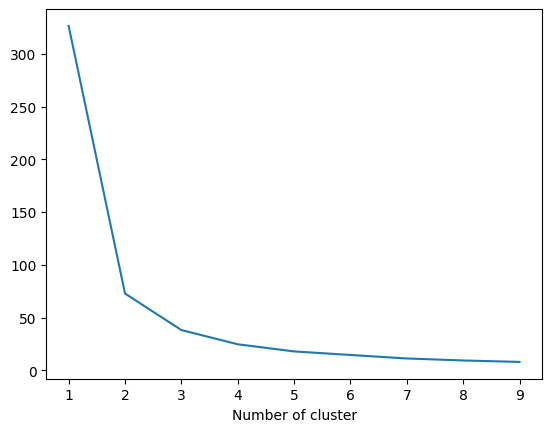

In [ ]:
from sklearn.cluster import KMeans

sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_std)
    # df_std["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

=> Số cụm k = 3 có thể là lựa chọn tốt (khoảng cách giữa các điểm dữ liệu là nhỏ nhất )

In [ ]:
kmeans = KMeans(n_clusters=3, random_state= 0)
kmeans.fit(df_std)
cluster = kmeans.predict(df_std)
df_cluster = pd.DataFrame(cluster)
df_rfm['Cluster'] = cluster
df_rfm.head()

,CustomerID,DateRecency,Frequency,Revenue,Cluster
0,12346.0,325,2,0.00,1
1,12347.0,2,182,4310.00,2
2,12348.0,75,31,1797.24,2
3,12349.0,18,73,1757.55,2
4,12350.0,310,17,334.40,1


## Evalute the insights

In [ ]:
df_rfm.groupby('Cluster')['DateRecency'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,811.0,152.453761,38.308027,92.0,117.0,151.0,185.0,222.0
1,634.0,294.903785,45.436572,225.0,256.0,288.0,329.0,373.0
2,2927.0,30.674411,24.935081,0.0,9.0,24.0,50.0,91.0


In [ ]:
df_rfm.groupby('Cluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,811.0,40.803946,48.305558,1.0,12.0,26.0,52.0,548.0
1,634.0,23.402208,28.239957,1.0,8.0,16.0,28.0,312.0
2,2927.0,122.617014,277.905519,1.0,27.0,62.0,135.5,7983.0


In [ ]:
df_rfm.groupby('Cluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,811.0,705.978756,943.698493,-4287.63,211.3100,435.020,847.0150,10217.48
1,634.0,404.903375,1012.111267,-1192.20,141.6575,252.925,411.1425,21535.90
2,2927.0,2552.377282,9957.282399,-1165.30,415.0050,967.450,2197.4450,279489.02


=> Như vậy:  

*   Cluster 2 là nhóm khách hàng mang lại giá trị cao mà doanh nghiệp không được bỏ mất
*   Cluster 1 là nhóm khách hàng không mang lại nhiều giá trị mà doanh nghiệp không nên tốn nhiều thời gian và chi phí cho nhóm KH này.
*   Cluster 0 là nhóm KH ở vị trí giữa High-value và Low-value.



In [ ]:
df_rfm.loc[df_rfm['Cluster'] == 2,'Segment'] = 'High-Value'
df_rfm.loc[df_rfm['Cluster'] == 0,'Segment'] = 'Mid-Value'
df_rfm.loc[df_rfm['Cluster'] == 1,'Segment'] = 'Low-Value'
df_rfm.head()

,CustomerID,DateRecency,Frequency,Revenue,Cluster,Segment
0,12346.0,325,2,0.00,1,Low-Value
1,12347.0,2,182,4310.00,2,High-Value
2,12348.0,75,31,1797.24,2,High-Value
3,12349.0,18,73,1757.55,2,High-Value
4,12350.0,310,17,334.40,1,Low-Value


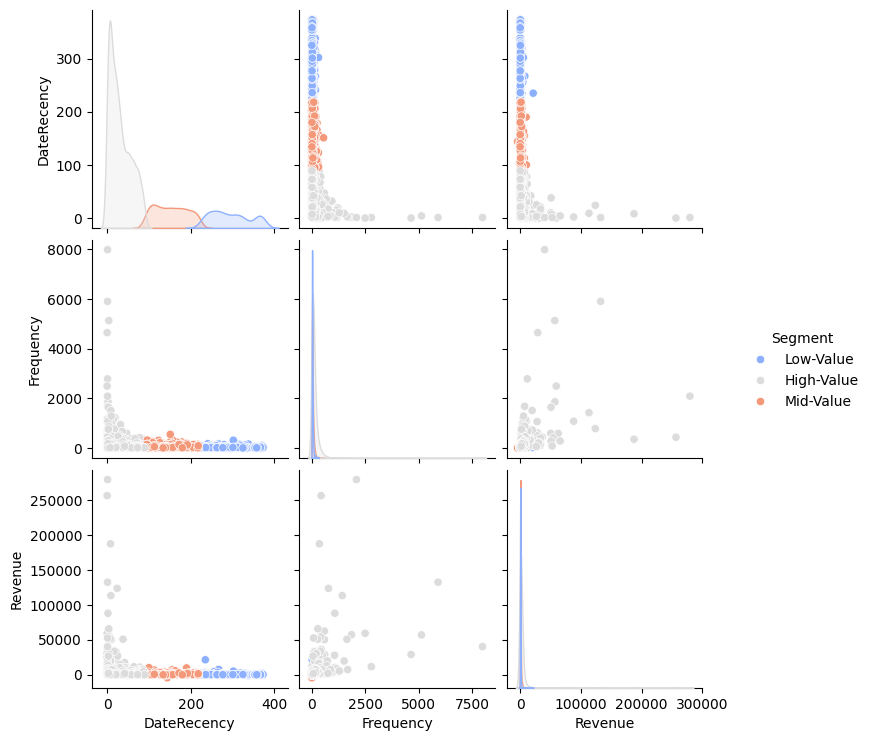

In [ ]:
column_to_viz = ['DateRecency',	'Frequency',	'Revenue', 'Segment']
sns.pairplot(df_rfm[column_to_viz], hue='Segment',palette='coolwarm')

=> Need to remove ouliners

In [ ]:
df_cluster.value_counts()

2    2927
0     811
1     634
Name: count, dtype: int64